# Homework 2a - Data Exploration and Analysis

This homework will take you through the data exploration process on the dataset that you had cleaned up in the previous homework. You will be using graphs to visualize the data, then move on to some mathemetical descriptions of the data, and then come up with some hypotheses to explain your findings.

## Setting up

For this HW you already have Anaconda installed as well Seaborn. You can check your Seaborn version by typing 
```conda list seaborn```. Currently, Anaconda does not natively allow you to update Seaborn to the latest 0.9.0 version. The [0.9.0 version](https://seaborn.pydata.org/whatsnew.html) of Seaborn has new and extremely useful plotting functions, such as lineplot() and relplot(), that will help you with the exploration. **Only do the following steps if you do not have Seaborn 0.9 and would like to use it. This homework can be done just as well without it. You can also update Seaborn without making a new environment, but then you run the risk of breaking your base environment in which case anaconda would have to be reinstalled.**

To update your Seaborn version, first create a [new Python-3 environment](https://conda.io/docs/user-guide/tasks/manage-environments.html) in your anaconda, to avoid breaking the base environment, by running the following command:

```conda create -n py36 python=3.6 anaconda```

Verify the environment was installed by typing:

```conda env list```

Switch to this environment when you want to work in it by typing:

```source activate py36``` (macOS/Linux) or ```activate py36```(Windows)

Update Seaborn: 

```conda install -c anaconda seaborn=0.9.0 --no-deps```

Switch back to base whenever you are done by: 

```source deactivate```

## Defining the Question

Think about the questions you would ask yourself just by looking at the previous data. In this homework we'll be exploring mainly two questions. At the end you choose a question of your own to explore!
1. How are the donations distributed? This is a overaching question that will mainly be answering many sub-questions
    1. Is there an overall increase or decrease in donations?
    2. Is there a pattern? Is the pattern weekly or monthly?
    3. Are there any spikes? If yes, can you hypothesize why?
2. In how much time will the Dam target of be reached (This will be done in part b of the homework)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = './'
data = pd.read_pickle(path+'individual_contributions.pkl')

data.head()

,Bank,Name,Amount,Date
0,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,25.0,2018-09-10
1,AL BARAKA BANK (PAKISTAN) LTD,SARFARAZ 0117,100.0,2018-09-10
2,AL BARAKA BANK (PAKISTAN) LTD,HAMNA ZEESHAN 0117,100.0,2018-09-10
3,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,200.0,2018-09-10
4,AL BARAKA BANK (PAKISTAN) LTD,NOMAN 0117,200.0,2018-09-10


## Part A: Finding distribution, historical trends and correlations

### Subpart 1: Distribution of the data (15 marks)

#### Plotting individual contributions
Below this cell make plots that give you an initial view of how the amounts are distribution i.e. how much money each person usually pays. Go through the [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html) to find out more. Also have a look at the [example gallery](https://seaborn.pydata.org/examples/index.html) to know what each visualization gives you.

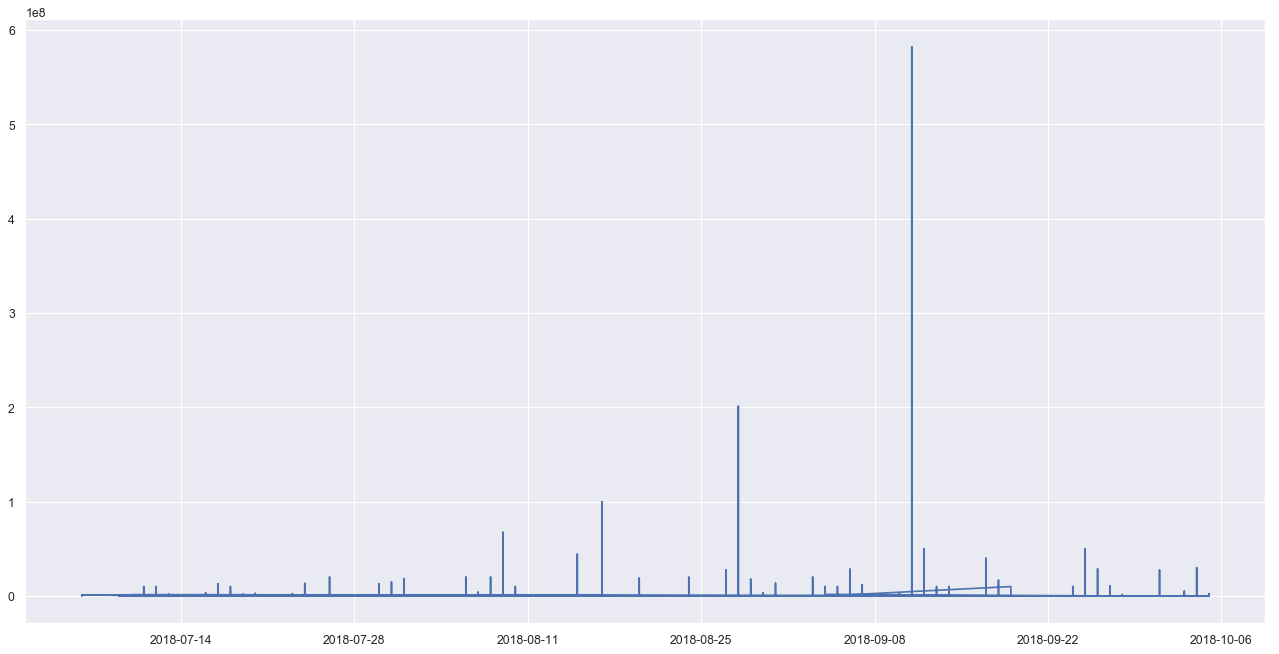

In [2]:
## Write code here that plots the Amounts Series in a way that the distribution can be known ##
## Make sure you figure out a way to deal with outliers when plotting the distribution ##
## This can either be done manually, or by in-built Seaborn parameters, or by scaling the graph appropriately ##

fig = plt.figure(figsize=(20,10), dpi=80)
sns.set()

plt.plot(data['Date'], data['Amount'])


#### Explaining outliers

In [3]:
## Now that you have a rough idea of the Amounts column looks like, let's try to find what the outliers are ##
## Write code here that allows you to check what the outliers are and who the donors are. Print the top donors ##


tempset = data.loc[data['Amount'] >= 1000000]
temp = tempset[['Name', 'Amount']]
temp = temp.sort_values(['Amount'], ascending=[False])

temp.head()
#np.sort(donation, order = 'Amount')

,Name,Amount
61292,PAK ARMY,5.820719e+08
137646,HQ CWO SPD,2.010938e+08
87084,HBL ISLAMIC CHARITY HBL ISLAMIC,1.000000e+08
53855,BAHRIA TOWN LTD UBL,6.750000e+07
59210,Debit Credit Card Settlement ADC,5.832347e+07


#### Final Takeaway:

Can any meaningful conclusion be drawn about how much money each person gives simply by looking at individual contributions? If not, why?

Answer: It will just give us idea about donation from that person. unless its a prominent person or institution, without context specification, its vague to draw any conclusion. Since its not main goal of this research. 

### Subpart 2: Finding Daily Patterns (15 marks)
We are now interesting in finding how the contributions change over time - in terms of the sum of contributions over a day, the number of contributions over a day, and see their pattern over a time-series plot.

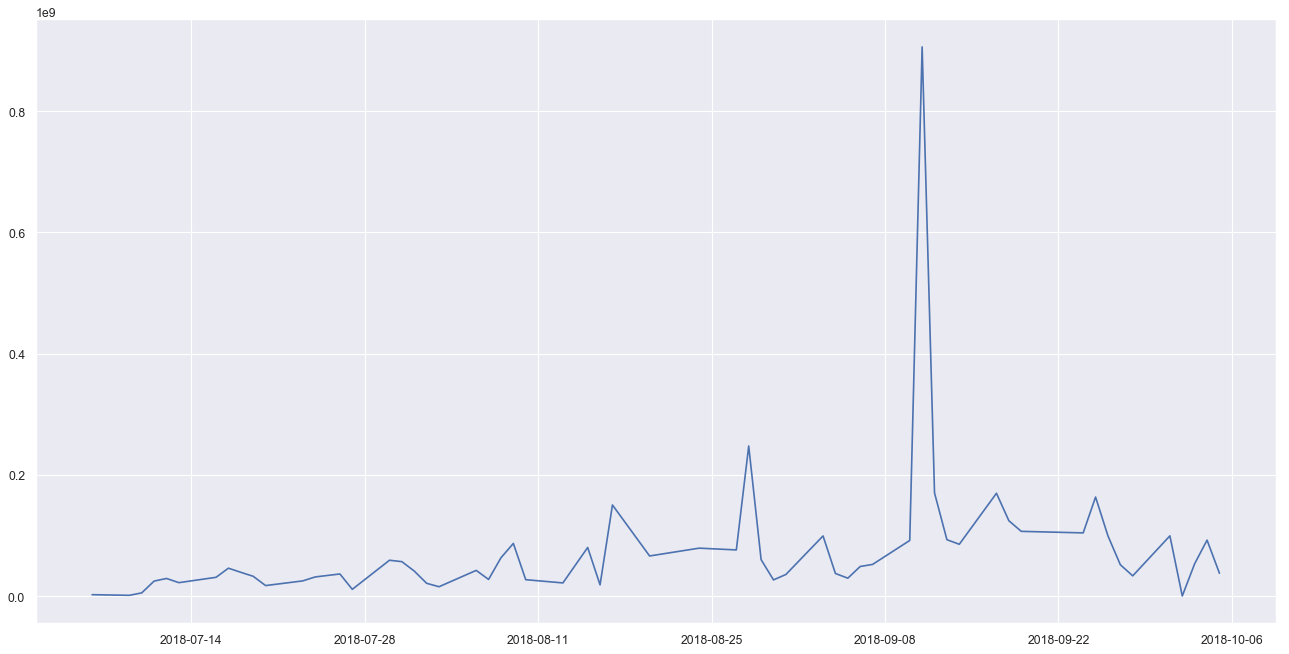

In [4]:
daily_totals = data.groupby(['Date']).sum()# Find total amount donated per-day
#print (daily_totals)
daily_counts = data.groupby(['Date']).size()# Find number of donations per-day
#print (daily_counts)

fig = plt.figure(figsize=(20,10), dpi=80)
sns.set()

# Plot of how daily totals change with date
plt.plot(daily_totals)

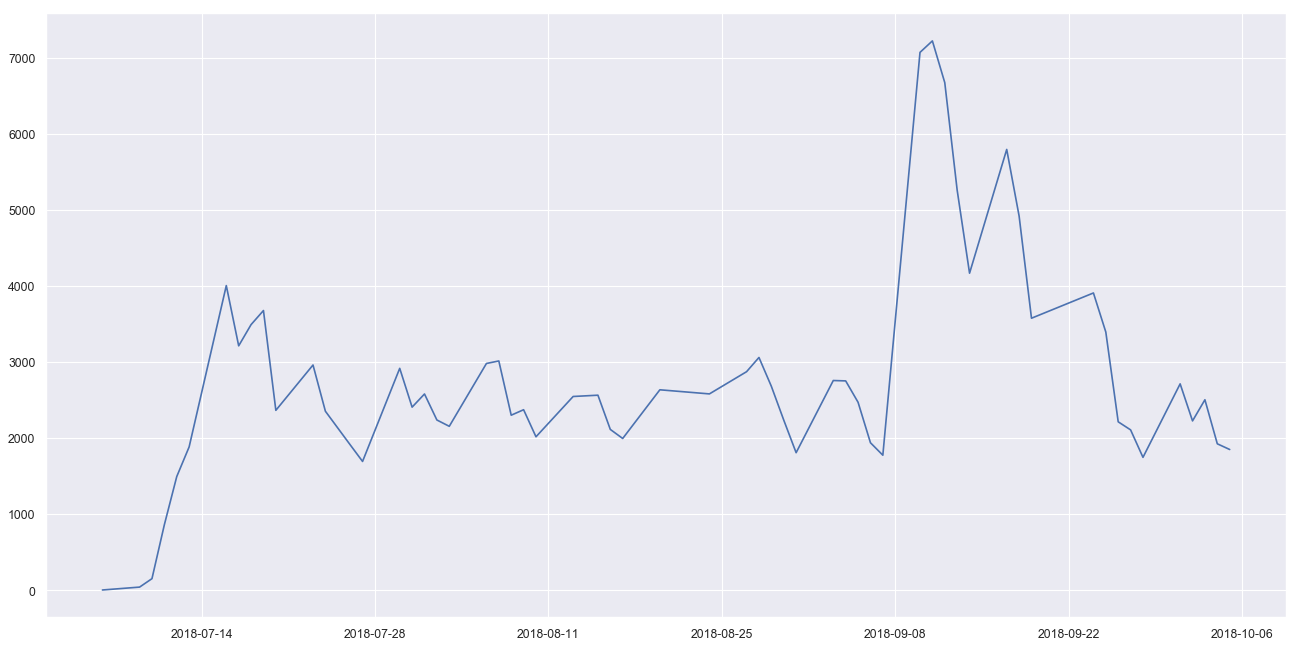

In [5]:
fig = plt.figure(figsize=(20,10), dpi=80)

# Plot of how daily counts change with date
plt.plot(daily_counts)

### Subpart 3: Finding Weekly Patterns (15 marks)
We need to know if there is any meaningful pattern to be found by adding a Day column into the dataframe, and then visualizing to see if the day of the week matters.

In [6]:
# Write a heuristic to add the Day column using the Date values
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day_name()

data.head()

,Bank,Name,Amount,Date,Day
0,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,25.0,2018-09-10,Monday
1,AL BARAKA BANK (PAKISTAN) LTD,SARFARAZ 0117,100.0,2018-09-10,Monday
2,AL BARAKA BANK (PAKISTAN) LTD,HAMNA ZEESHAN 0117,100.0,2018-09-10,Monday
3,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,200.0,2018-09-10,Monday
4,AL BARAKA BANK (PAKISTAN) LTD,NOMAN 0117,200.0,2018-09-10,Monday


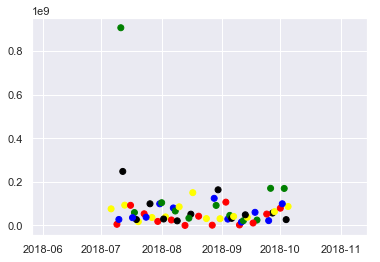

In [7]:
# Plot a graph using either "hue" or "size", or any other parameter to 
# emphasise the Day along with the Date and Daily_Totals
# Go to the documentation to see how this is done

colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday':'green', 'Thursday':'black', 'Friday':'yellow', 'Saturday': 'cyan', 'Sunday': 'purple'}

Dates = data['Date'].unique()

temp = data[['Date', 'Day']]
temp = temp.drop_duplicates()

#print (temp)
day = temp['Day']

plt.scatter(Dates, daily_totals, c= day.apply((lambda x: colors[x])))

### Subpart 4: Finding Correlations (15 marks)

Now that we have roughly visualized how the data is spread over a daily basis and a weekly basis, we now wanted to know if there is any correlation between Day of the week and Amount, or between Time of the month and Amount (i.e. whether the 1st of the month is more likely to have higher donations than, say, the 20th of the month). If you want to find the correlation between an output, or a dependent variable, and a set of independent variables, or inputs, then you need to run some sort of a regression. In our case, since the output is a continuous variable (Amount), we want to run a linear regression. While we will not be using regression to make any predictions in this part, it is still one of the best ways to find the correlation between the input and the output.

Before we move in, think about this: would you want to check whether the correlation between exact date of the month (1st vs 2nd vs 3rd), or would you want to roughly set boundaries as the start of the month (1st - 10th), mid (11th - 20th), and end (20th - 31st). What do you think would give a higher correlation? Which gives more meaningful information?

We'll be using the [sklearn library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) to run the regression and find the R-squared score.

#### Preprocessing variables
Linear Regression can not be done with categorical variables. So how do you run a regression with them? There are many methods to preprocess the categorical variables in a way that they become numerical. The basic principle behind all of them is to assign some number to them. The exact methods will be left to your discovery, but some links are provided below.

[scikit-learn preprocessing module](http://scikit-learn.org/stable/modules/preprocessing.html), particularly section 4.3.4, gives insight on how they have in-built libraries to deal with categorical variables.

[scikit-learn OneHotEncoder](http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

[scikit-learn OrdinalEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)

In this case, particularly for the Time_of_month variable, it might just be easier to make your own method to convert the Datetime object (which is a categorical variable) into a numeric. Especially considering that we'll be checking correlations between the amount donated and the time of month.

**Important:** For any method you choose, make sure you have sound reasoning for why you chose that particular way to convert a categorical variable into a numeric. Research!

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Write code here to extract a Time_of_month numeric variable from the DateTime object #
temp['Date']= temp.Date.apply(str)
ordinals=[]

for i in temp['Date']:
    temp = int(i.split(' ')[0].split('-')[2])
    ordinals.append(temp)


X = pd.DataFrame(ordinals)
y = daily_totals['Amount']

reg_TimeOfMonth = LinearRegression()
reg_TimeOfMonth.fit(X,y)

print(reg_TimeOfMonth.score(X, y))

0.002041681069247847


In [10]:
# Write code here to convert the Day variable, defined in Part 3, into a numeric #

temp['Day']=temp['Day'].map( {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5})

X = np.array(temp['Day']).reshape(-1,1)
y = daily_totals

reg_Day = LinearRegression()
reg_Day.fit(X,y)

print(reg_Day.score(X, y))

TypeError: 'int' object is not subscriptable

### Subjective Question (Bonus 10 marks)
Would running a Multiple Linear Regression using both X variables, instead of a seperate regressions on Day_of_week and Time_of_month, provide us with the correct conclusions? What information would that give us?

Answer: Since both time of month and day of week are related to each other, it would provide us better conclusion. It would tell us trend of money donation by people on particular days or time of month. However, regression isn't close to 1 so results may not be accurate in provided data.